### NAME : S.Sanjith
### ID NO : 190562G
### COURSE CODE : EN2550

In [3]:
# Importing libraries
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import cm


(-0.5, 60.5, 60.5, -0.5)

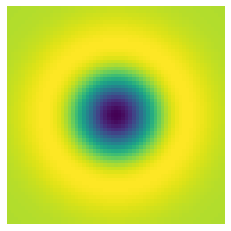

In [5]:
# question 01
sigma = 10
hw = 3*sigma

X = np.arange(-hw, hw+1, 1)
Y = np.arange(-hw, hw+1, 1)
XX, YY = np.meshgrid(X, Y)

log = 1/(2*np.pi*sigma**2)*(XX**2/(sigma**2)+YY**2/(sigma**2)-2) * \
    np.exp(-(XX**2+YY**2)/(2*sigma**2))

plt.imshow(log)
plt.axis("off")


<ipython-input-6-5dfebaa40661>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  surf = ax1.plot_surface(XX,YY,log, cmap=cm.ocean,lineWidth=0,antialiased=True)


(-33.0, 33.0, -33.0, 33.0)

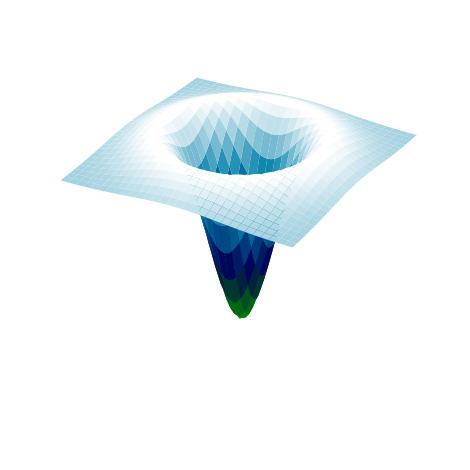

In [6]:
#Showing in 3-d
fig = plt.figure(figsize=(18, 18))
ax1 =fig.add_subplot(121,projection='3d')
surf = ax1.plot_surface(XX,YY,log, cmap=cm.ocean,lineWidth=0,antialiased=True)
ax1.axis('off')


(-0.5, 70.5, 70.5, -0.5)

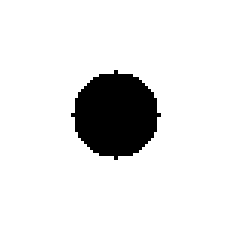

In [8]:
# question 02
w, h = 71, 71
hw, hh = w//2, h//2

X = np.arange(-hh, hh+1, 1)
Y = np.arange(-hw, hw+1, 1)
XX, YY = np.meshgrid(X, Y)

f = np.ones((h, w), dtype=np.float32)*255

r = w//5
f *= XX**2 + YY**2 > r**2

plt.imshow(f,cmap='gray')
plt.axis('off')


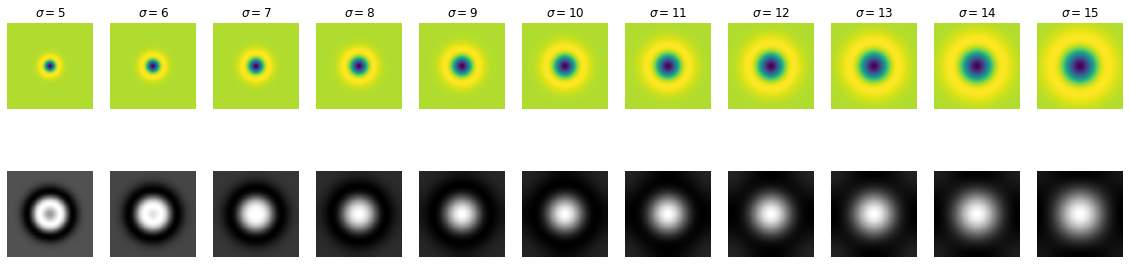

In [9]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20, 5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X = np.arange(-log_hw, log_hw+1, 1)
    Y = np.arange(-log_hw, log_hw+1, 1)
    XX, YY = np.meshgrid(X, Y)
    log = 1/(2*np.pi*sigma**2)*(XX**2/(sigma**2)+YY**2 /
                                (sigma**2)-2) * np.exp(-(XX**2+YY**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log

    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r"$\sigma={}$".format(sigma))
    ax[1, i].imshow(f_log,cmap='gray')
    ax[1, i].axis('off')

indices = np.unravel_index(
    np.argmax(scale_space, axis=None), scale_space.shape)


In [6]:
print(indices)
print(sigmas[indices[2]])


(35, 35, 5)
10


value of $\sigma$ corresponding to maximum occurance of peak response = $\frac{r}{\sqrt{2}}=\frac{14}{\sqrt{2}}=9.89$ <br>
which is more closure to $\sigma=10$

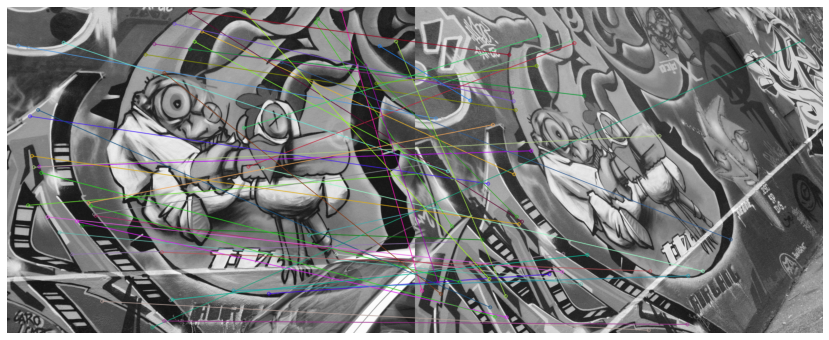

In [14]:
# question 03
f3_1=cv.imread(r'images/e5_img1.ppm',cv.IMREAD_GRAYSCALE)
assert f3_1 is not None

f3_2=cv.imread(r'images/e5_img4.ppm',cv.IMREAD_GRAYSCALE)
assert f3_2 is not None

sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(f3_1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(f3_2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

f3 = cv.drawMatches(f3_1, keypoints_1, f3_2, keypoints_2, matches[:50], f3_2, flags=2)
fig = plt.figure(figsize=(18, 6))
plt.imshow(f3)
plt.axis("off")
plt.show()

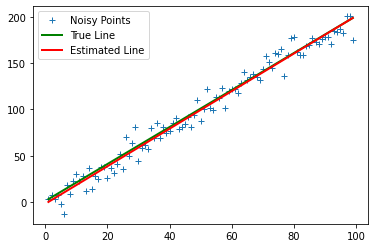

In [7]:
# Least square line fitting
m = 2
c = 1
x = np.arange(1, 100, 1)
np.random.seed(45)
sigma = 10
n = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)
# o[=1] = 20 #outliner
y = m*x + c + n + o

n = len(x)
X = np.concatenate([x.reshape(n, 1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T@X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot(x, y, '+', label="Noisy Points")
plt.plot([x[0], x[-1]], [m*x[0]+c, m*x[-1]+c],
         color='g', linewidth=2, label=r"True Line")
plt.plot([x[0], x[-1]], [mstar*x[0]+cstar, mstar*x[-1]+cstar],
         color='r', linewidth=2, label=r"Estimated Line")

plt.legend()


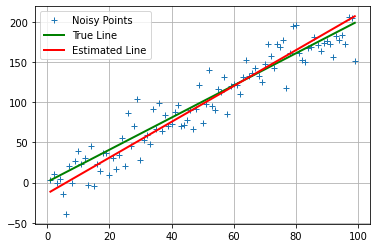

In [20]:
# Least square line fitting
m = 2
c = 1
x = np.arange(1, 100, 1)
np.random.seed(45)
sigma = 20
n = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)
# o[=1] = 20 #outliner
y = m*x + c + n + o

n = len(x)
u11 = np.sum((x-np.mean(x))**2)
u12 = np.sum((x-np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y-np.mean(y))**2)

U = np.array([[u11, u12], [u21, u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:, np.argmin(W)]

[a,b] = ev_corresponding_to_smallest_ev
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot(x, y, '+', label="Noisy Points")
plt.plot([x[0], x[-1]], [m*x[0]+c, m*x[-1]+c],
         color='g', linewidth=2, label="True Line")
plt.plot([x[0], x[-1]], [mstar*x[0]+cstar, mstar*x[-1]+cstar],
         color='r', linewidth=2, label="Estimated Line")
plt.grid(True)

plt.legend()